In [1]:
import pandas as pd

diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
len(diabetes_df)

768

In [3]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


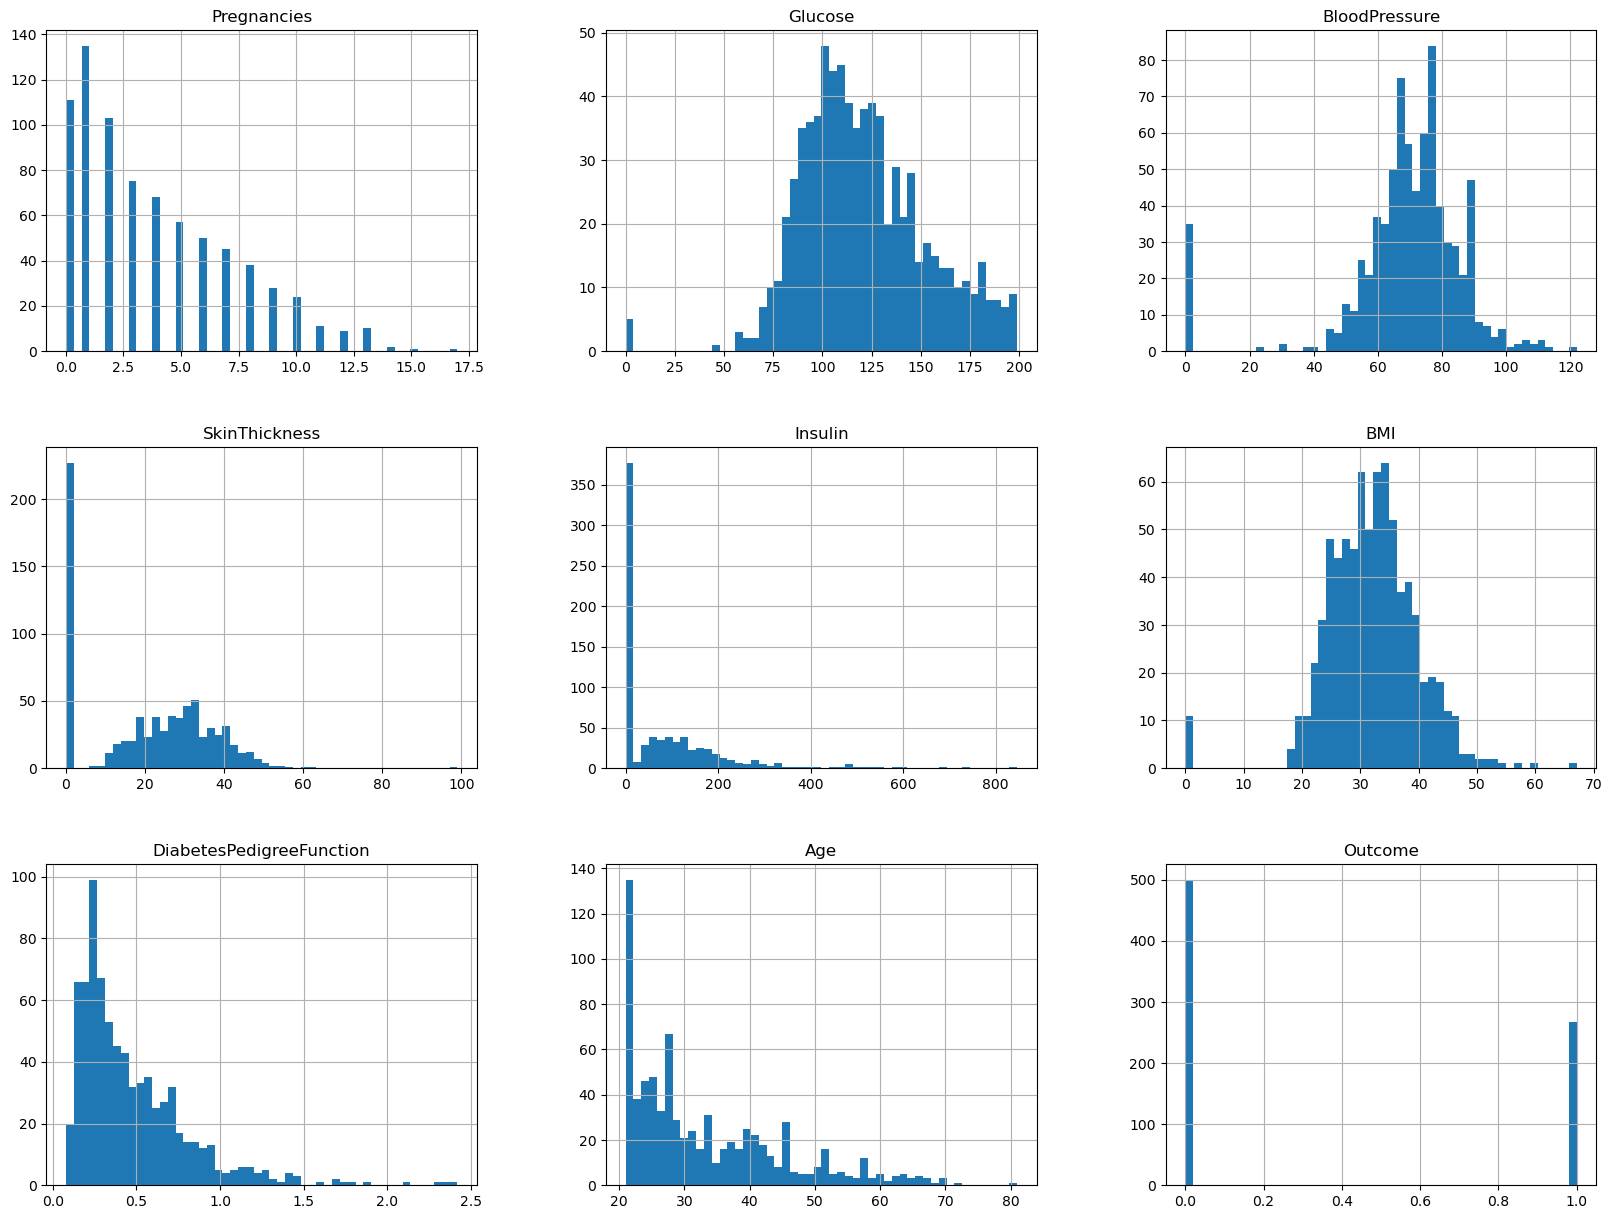

In [5]:
import matplotlib.pyplot as plt

diabetes_df.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
correlations = diabetes_df.corr()['Outcome'].sort_values()

In [7]:
correlations

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

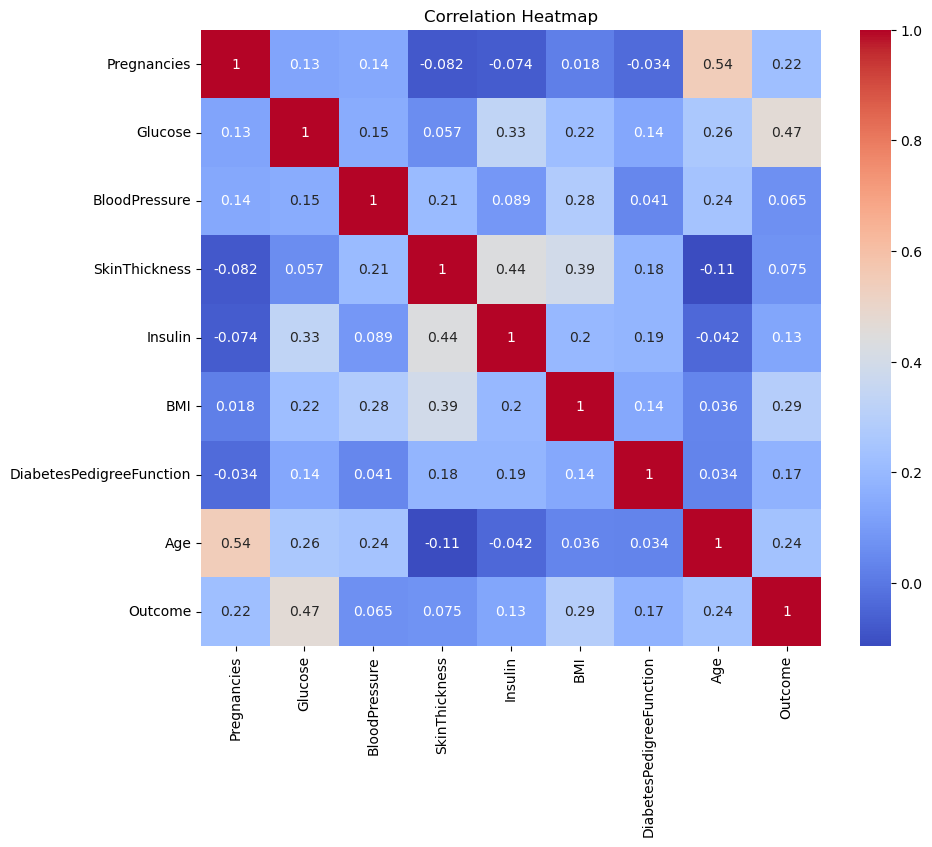

In [8]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

(diabetes_df[cols] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [10]:
for col in cols:
    median = diabetes_df[col].median()
    diabetes_df[col] = diabetes_df[col].replace(0, median)

In [11]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [15]:
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7662337662337663

In [16]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

confusion, precision, recall, f1

(array([[82, 17],
        [19, 36]], dtype=int64),
 0.6792452830188679,
 0.6545454545454545,
 0.6666666666666666)

In [17]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred_forest = forest_clf.predict(X_test_scaled)

accuracy_forest = accuracy_score(y_test, y_pred_forest)
confusion_forest = confusion_matrix(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest)
recall_forest = recall_score(y_test, y_pred_forest)
f1_forest = f1_score(y_test, y_pred_forest)

accuracy_forest, confusion_forest, precision_forest, recall_forest, f1_forest

(0.7662337662337663,
 array([[80, 19],
        [17, 38]], dtype=int64),
 0.6666666666666666,
 0.6909090909090909,
 0.6785714285714286)

In [19]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [20]:
y_pred_svm = svm_clf.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
confusion_svm = confusion_matrix(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

accuracy_svm, confusion_svm, precision_svm, recall_svm, f1_svm

(0.7532467532467533,
 array([[84, 15],
        [23, 32]], dtype=int64),
 0.6808510638297872,
 0.5818181818181818,
 0.627450980392157)

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(forest_clf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [22]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'max_depth': 10,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 300},
 0.7801679328268692)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

best_model = grid_search.best_estimator_

# Predict the test set results
y_pred = best_model.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the precision
precision = precision_score(y_test, y_pred)

# Calculate the recall
recall = recall_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

accuracy, cm, precision, recall, f1

(0.7662337662337663,
 array([[80, 19],
        [17, 38]], dtype=int64),
 0.6666666666666666,
 0.6909090909090909,
 0.6785714285714286)

In [24]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'max_depth': 10,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 300},
 0.7801679328268692)

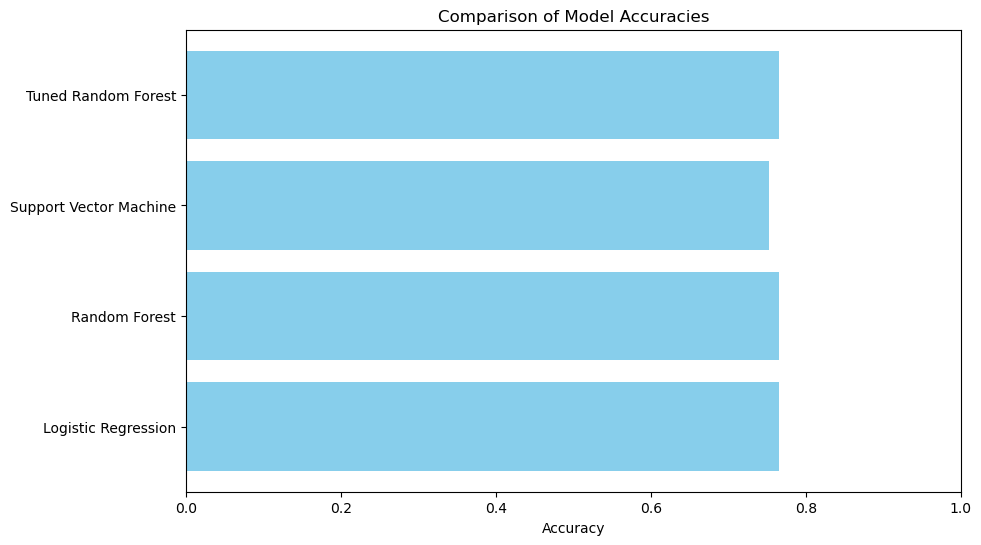

In [25]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Tuned Random Forest']
accuracies = [0.766, 0.766, 0.753, 0.766]

plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xlim(0, 1)
plt.show()

## Conclusion

In this project, we performed exploratory data analysis and predictive modeling on a diabetes dataset. We started by exploring the data using Python, where we analyzed the distributions of the features and the relationships between them. We then preprocessed the data by handling missing values and scaling the features.

We trained and evaluated several machine learning models, including Logistic Regression, K-Nearest Neighbors, and Random Forest. We found that the Random Forest model had the best performance on the cross-validation sets. We then improved the performance of the Random Forest model by tuning its hyperparameters using grid search.

The best model achieved an accuracy of approximately 76.6% on the test set. It had a precision of approximately 66.7%, meaning that when it predicts a patient has diabetes, it's correct about 66.7% of the time. It had a recall of approximately 69.1%, meaning that it correctly identifies 69.1% of all diabetic patients. The F1 score, which is the harmonic mean of precision and recall, was approximately 67.9%.

These results suggest that the model could be a useful tool for predicting diabetes. However, there's still room for improvement. Future work could explore other preprocessing techniques, feature engineering, other machine learning models, and more extensive hyperparameter tuning.